# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

## Esercizio 10.1

In questo esercizio adattiamo il codice e le classi implementate per l'algoritmo genetico (GA) dell'esercitazione 9 per risolvere il problema del commesso viaggiatore con l'algoritmo del **Simulated Annealing** (SA) sempre per 32 città su una circonferenza e 32 città all'interno di un quadrato. 

### Simulated Annealing
Per implementare il Simulated annealing, si interpreta la funzione costo (che nel nostro caso è $L^{(1)}$) come l'energia di un sistema termodinamico soggetto a una distribuzione di Boltzmann da campionare $p(x) = e^{-\beta L(x)}$. Partendo da una certa temperatura fittizia iniziale $T_i$ abbastanza elevata (con un corrispondente $\beta_i$) e diminuendo gradualmente la temperatura, il sistema raffredda e quindi si muove verso l'energia minima, ovvero i minimi di $L^{(1)}$.
Sono partita quindi da un Individuo e la mossa proposta consiste in una delle 4 mutazioni implementate nell'esercitazione 9. Il nuovo Individuo mutato viene accettato con Metropolis con probabiltà di accettazione data da $p = e^{-\beta \Delta L}$ con $\Delta L = L_{new} - L_{old}$, essendo $L_{new}$ la funzione costo dell'individuo mutato e $L_{old}$ la funzione costo prima della mutazione. In totale ho effettuato $M = 4 x 10^5$ passi, dato che parto da $\beta_i = 0.02$ con $n = 4000$ aumenti graduali di temperatura e ad ogni temperatura vengono svolti $n_i = 100$ steps.

Di seguito ho riportato i grafici della lunghezza del miglior percorso e del miglior percorso sia per l'algoritmo genetico (in funzione del numero di generazioni) dell'esercitazione 9 che per il simulated annealing (in funzione del numero di iterazioni).
### $L^{(1)}$ del miglior percorso

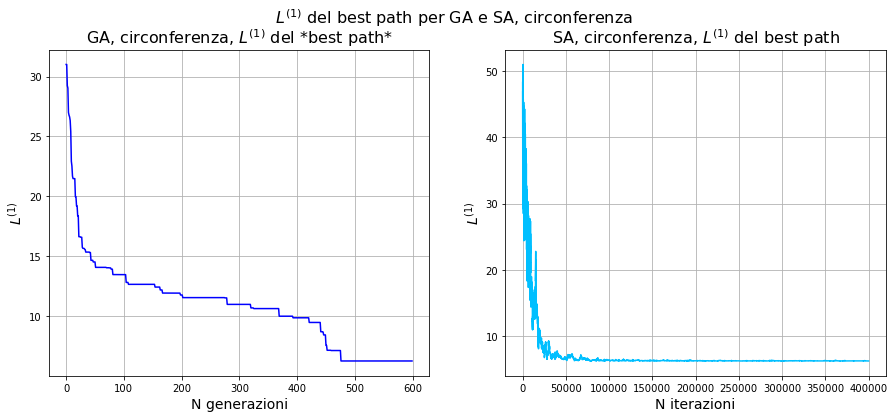

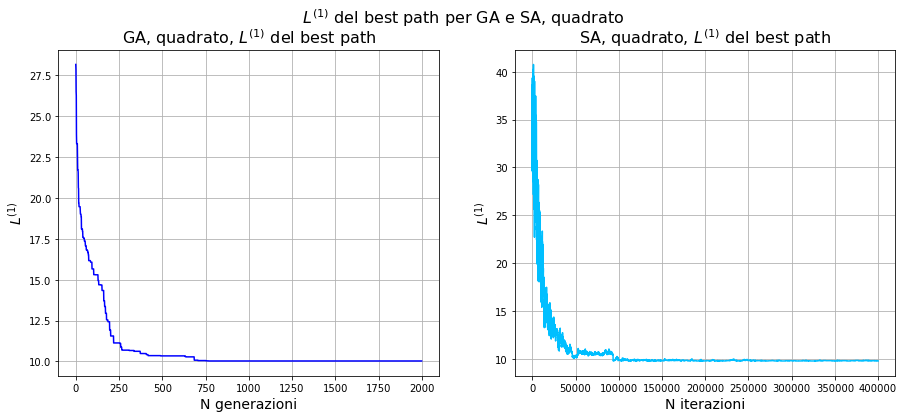

In [31]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

best_circ = np.loadtxt("es10.1/L1_best_path_circ.out",usecols=(1), unpack = True)
SA_best_circ = np.loadtxt("es10.1/SA_L1_best_path_circ.out",usecols=(0), unpack = True)

best_quad = np.loadtxt("es10.1/L1_best_path_quad.out",usecols=(1), unpack = True)
SA_best_quad = np.loadtxt("es10.1/SA_L1_best_path_quad.out",usecols=(0), unpack = True) 

fig = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle("$L^{(1)}$ del best path per GA e SA, circonferenza",fontsize=16)
 
#Circonferenza GA
ax1=plt.subplot(1,2,1)
ax1.plot(best_circ, color="blue")
ax1.set_xlabel('N generazioni',fontsize=14)
ax1.set_ylabel("$L^{(1)}$",fontsize=14);
ax1.set_title("GA, circonferenza, $L^{(1)}$ del *best path*",fontsize=16)
ax1.grid(True)

#Circonferenza SA
ax2=plt.subplot(1,2,2)
ax2.plot(SA_best_circ, color="deepskyblue")
ax2.set_xlabel('N iterazioni',fontsize=14)
ax2.set_ylabel("$L^{(1)}$",fontsize=14);
ax2.set_title("SA, circonferenza, $L^{(1)}$ del best path",fontsize=16)
ax2.grid(True)

fig = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle("$L^{(1)}$ del best path per GA e SA, quadrato",fontsize=16)
 
#Quadrato GA
ax1=plt.subplot(1,2,1)
ax1.plot(best_quad, color="blue")
ax1.set_xlabel('N generazioni',fontsize=14)
ax1.set_ylabel("$L^{(1)}$",fontsize=14);
ax1.set_title("GA, quadrato, $L^{(1)}$ del best path",fontsize=16)
ax1.grid(True)

#Quadrato SA
ax2=plt.subplot(1,2,2)
ax2.plot(SA_best_quad, color="deepskyblue")
ax2.set_xlabel('N iterazioni',fontsize=14)
ax2.set_ylabel("$L^{(1)}$",fontsize=14);
ax2.set_title("SA, quadrato, $L^{(1)}$ del best path",fontsize=16)
ax2.grid(True)

Come si può vedere per il caso del simulated annealing, a basso numero di iterazioni, la lunghezza del percorso oscilla anche di molto e ciò è dovuto al fatto che ad alte temperature il sistema può portarsi anche a configurazioni ad energia maggiore. All'aumentare del numero di iterazioni e quindi all'abbassarsi della temperatura, si ha però una graduale diminuzione di $L^{(1)}$ fino al valore minimo cercato. 
Nel caso della circonferenza e del quadrato si hanno come valori finali di $L^{(1)}$: 
- Circonferenza: $L^{(1)}_{GA} = 6.2403$ e $L^{(1)}_{SA} = 6.2403$ $\rightarrow$ i due algoritmi arrivano allo stesso miglior percorso finale;
- Quadrato: $L^{(1)}_{GA} = 10.0312$ e $L^{(1)}_{SA} = 9.78156$ $\rightarrow$ in questo caso i due algoritmi non arrivano allo stesso miglior percorso finale, il SA riesce ad arrivare a una soluzione migliore. Si potrebbe pensare di aumentare di molto il numero di generazioni nell'algoritmo genetico ma, come si può osservare dall'ultimo grafico sulla sinistra, anche considerando fino a 2000 generazioni, il valore di $L^{(1)}$ resta stabile a 10.0312 circa dalla generazione 700.

### Miglior percorso

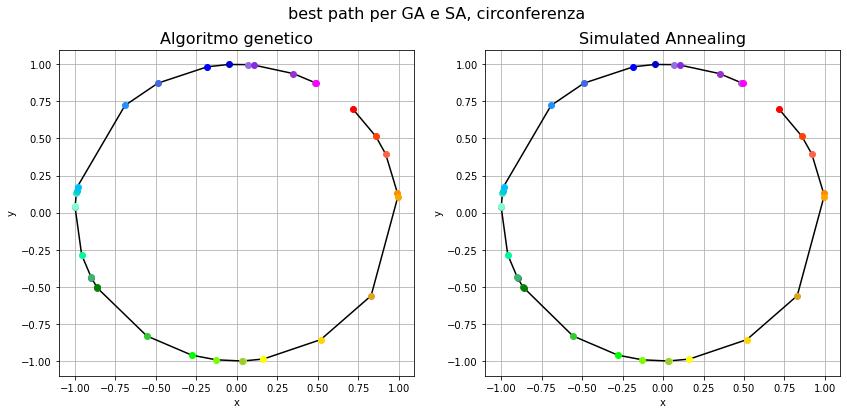

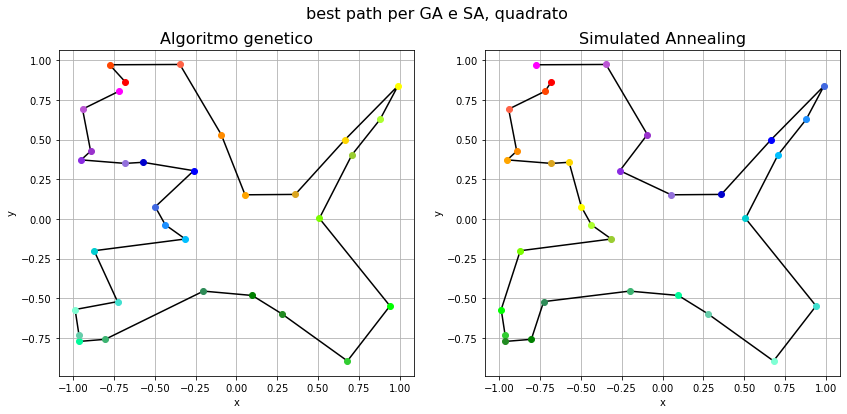

In [32]:
city_x0,city_y0 = np.loadtxt("es10.1/final_cities_circ.out",usecols=(0,1), unpack = True)
city_x1,city_y1 = np.loadtxt("es10.1/SA_final_cities_circ.out",usecols=(0,1), unpack = True)
city_x2,city_y2 = np.loadtxt("es10.1/final_cities_quad.out",usecols=(0,1), unpack = True)
city_x3,city_y3 = np.loadtxt("es10.1/SA_final_cities_quad.out",usecols=(0,1), unpack = True)

fig = plt.subplots(1, 2, figsize=(14, 6))

colors = ["red","orangered","tomato","darkorange","orange","goldenrod","gold","yellow",
          "greenyellow","yellowgreen","lawngreen","lime","limegreen","forestgreen","green","seagreen",
          "mediumseagreen","mediumspringgreen","mediumaquamarine","aquamarine","turquoise","darkturquoise","deepskyblue","dodgerblue",
          "royalblue","blue","mediumblue","mediumpurple","blueviolet","darkorchid","mediumorchid","magenta"]

plt.suptitle("best path per GA e SA, circonferenza",fontsize=16)

ax1=plt.subplot(1,2,1)
ax1.plot(city_x0,city_y0, color = "black")
for i in range(0,32):
    ax1.plot(city_x0[i],city_y0[i], color = colors[i], marker = '.', markersize = 12)
ax1.set_title("Algoritmo genetico", fontsize=16)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)

ax2=plt.subplot(1,2,2)
ax2.plot(city_x1,city_y1, color = "black")
for i in range(0,32):
    ax2.plot(city_x1[i],city_y1[i], color = colors[i], marker = '.', markersize = 12)
ax2.set_title("Simulated Annealing", fontsize=16)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

fig = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("best path per GA e SA, quadrato",fontsize=16)

ax1=plt.subplot(1,2,1)
ax1.plot(city_x2,city_y2, color = "black")
for i in range(0,32):
    ax1.plot(city_x2[i],city_y2[i], color = colors[i], marker = '.', markersize = 12)
ax1.set_title("Algoritmo genetico", fontsize=16)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)

ax2=plt.subplot(1,2,2)
ax2.plot(city_x3,city_y3, color = "black")
for i in range(0,32):
    ax2.plot(city_x3[i],city_y3[i], color = colors[i], marker = '.', markersize = 12)
ax2.set_title("Simulated Annealing", fontsize=16)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

Come già anticipato, nel caso della circonferenza i due algoritmi arrivano allo stesso percorso finale, partendo dalla città in rosso fino ad arrivare al viola con $L^{(1)}_{GA} = L^{(1)}_{SA} = 6.2403 $. Nel caso delle 32 città nel quadrato invece i due algoritmi arrivano a due percorsi leggermente diversi e percorsi in senso opposto.

## Esercizio 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

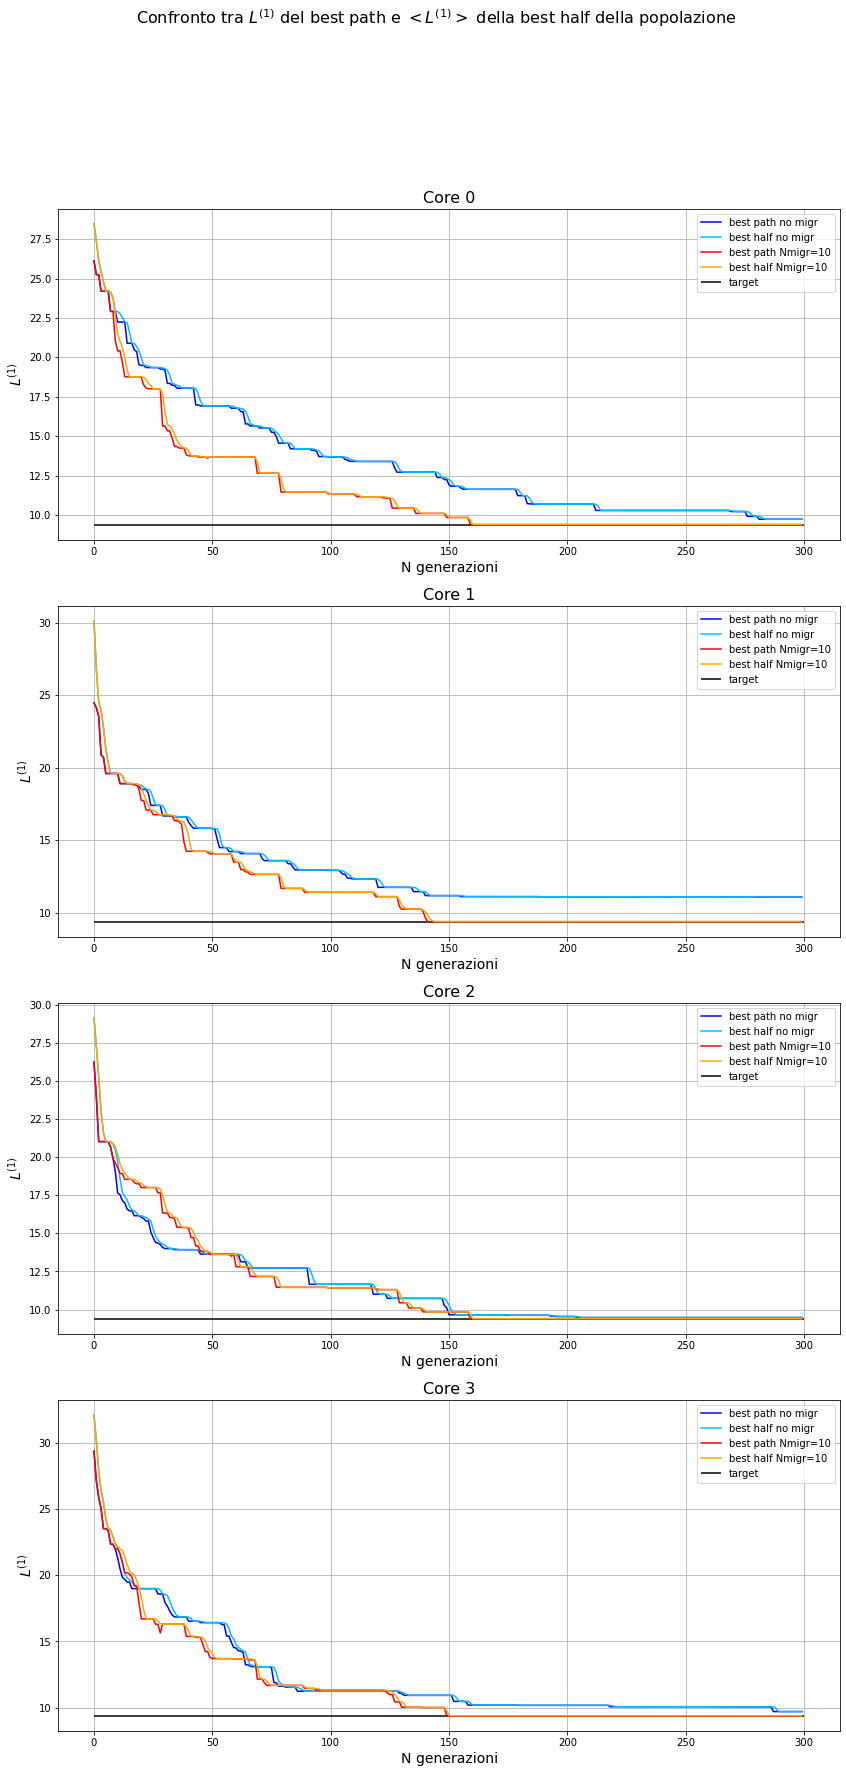

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

g,best_quad0_no = np.loadtxt("es10.2/nomigr/L1_best_path_quad0.out",usecols=(0,1), unpack = True)
g,half_quad0_no = np.loadtxt("es10.2/nomigr/L1_best_half_quad0.out",usecols=(0,1), unpack = True) 
g,best_quad0_10 = np.loadtxt("es10.2/Nmigr10/L1_best_path_quad0.out",usecols=(0,1), unpack = True)
g,half_quad0_10 = np.loadtxt("es10.2/Nmigr10/L1_best_half_quad0.out",usecols=(0,1), unpack = True)

g,best_quad1_no= np.loadtxt("es10.2/nomigr/L1_best_path_quad1.out",usecols=(0,1), unpack = True)
g,half_quad1_no = np.loadtxt("es10.2/nomigr/L1_best_half_quad1.out",usecols=(0,1), unpack = True) 
g,best_quad1_10 = np.loadtxt("es10.2/Nmigr10/L1_best_path_quad1.out",usecols=(0,1), unpack = True)
g,half_quad1_10 = np.loadtxt("es10.2/Nmigr10/L1_best_half_quad1.out",usecols=(0,1), unpack = True)

g,best_quad2_no= np.loadtxt("es10.2/nomigr/L1_best_path_quad2.out",usecols=(0,1), unpack = True)
g,half_quad2_no = np.loadtxt("es10.2/nomigr/L1_best_half_quad2.out",usecols=(0,1), unpack = True) 
g,best_quad2_10 = np.loadtxt("es10.2/Nmigr10/L1_best_path_quad2.out",usecols=(0,1), unpack = True)
g,half_quad2_10 = np.loadtxt("es10.2/Nmigr10/L1_best_half_quad2.out",usecols=(0,1), unpack = True)

g,best_quad3_no= np.loadtxt("es10.2/nomigr/L1_best_path_quad3.out",usecols=(0,1), unpack = True)
g,half_quad3_no = np.loadtxt("es10.2/nomigr/L1_best_half_quad3.out",usecols=(0,1), unpack = True) 
g,best_quad3_10 = np.loadtxt("es10.2/Nmigr10/L1_best_path_quad3.out",usecols=(0,1), unpack = True)
g,half_quad3_10 = np.loadtxt("es10.2/Nmigr10/L1_best_half_quad3.out",usecols=(0,1), unpack = True)

fig = plt.subplots(4, 1, figsize=(14, 28))
plt.suptitle("Confronto tra $L^{(1)}$ del best path e $<L^{(1)}>$ della best half della popolazione",fontsize=16)
 
#Quadrato, core0
ax1=plt.subplot(4,1,1)
ax1.plot(g,best_quad0_no, color="blue", label = 'best path no migr')
ax1.plot(g,half_quad0_no, color="deepskyblue", label = 'best half no migr')
ax1.plot(g,best_quad0_10, color="red", label = 'best path Nmigr=10')
ax1.plot(g,half_quad0_10, color="orange", label = 'best half Nmigr=10')
ax1.hlines(9.39768,0,300, label = "target")
ax1.set_xlabel('N generazioni',fontsize=14)
ax1.set_ylabel("$L^{(1)}$",fontsize=14);
ax1.set_title("Core 0",fontsize=16)
ax1.legend()
ax1.grid(True)

#Quadrato, core1
ax2=plt.subplot(4,1,2)
ax2.plot(g,best_quad1_no, color="blue", label = 'best path no migr')
ax2.plot(g,half_quad1_no, color="deepskyblue", label = 'best half no migr')
ax2.plot(g,best_quad1_10, color="red", label = 'best path Nmigr=10')
ax2.plot(g,half_quad1_10, color="orange", label = 'best half Nmigr=10')
ax2.hlines(9.39768,0,300, label = "target")
ax2.set_xlabel('N generazioni',fontsize=14)
ax2.set_ylabel("$L^{(1)}$",fontsize=14);
ax2.set_title("Core 1",fontsize=16)
ax2.legend()
ax2.grid(True)

#Quadrato, core2
ax3=plt.subplot(4,1,3)
ax3.plot(g,best_quad2_no, color="blue", label = 'best path no migr')
ax3.plot(g,half_quad2_no, color="deepskyblue", label = 'best half no migr')
ax3.plot(g,best_quad2_10, color="red", label = 'best path Nmigr=10')
ax3.plot(g,half_quad2_10, color="orange", label = 'best half Nmigr=10')
ax3.hlines(9.39768,0,300, label = "target")
ax3.set_xlabel('N generazioni',fontsize=14)
ax3.set_ylabel("$L^{(1)}$",fontsize=14);
ax3.set_title("Core 2",fontsize=16)
ax3.legend()
ax3.grid(True)

#Quadrato, core3
ax4=plt.subplot(4,1,4)
ax4.plot(g,best_quad3_no, color="blue", label = 'best path no migr')
ax4.plot(g,half_quad3_no, color="deepskyblue", label = 'best half no migr')
ax4.plot(g,best_quad3_10, color="red", label = 'best path Nmigr=10')
ax4.plot(g,half_quad3_10, color="orange", label = 'best half Nmigr=10')
ax4.hlines(9.39768,0,300, label = "target")
ax4.set_xlabel('N generazioni',fontsize=14)
ax4.set_ylabel("$L^{(1)}$",fontsize=14);
ax4.set_title("Core 3",fontsize=16)
ax4.legend()
ax4.grid(True)

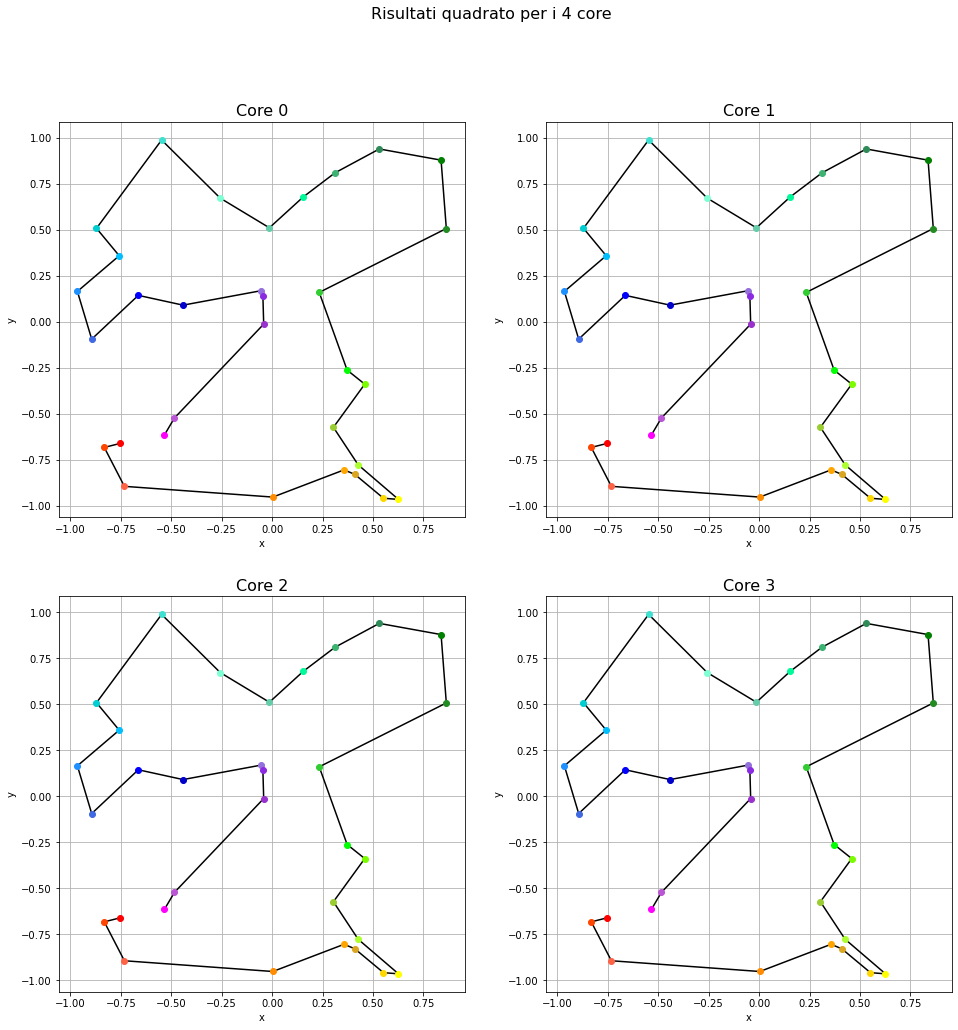

In [13]:
city_x0,city_y0 = np.loadtxt("es10.2/Nmigr10/final_cities_quad0.out",usecols=(0,1), unpack = True)
city_x1,city_y1 = np.loadtxt("es10.2/Nmigr10/final_cities_quad1.out",usecols=(0,1), unpack = True)
city_x2,city_y2 = np.loadtxt("es10.2/Nmigr10/final_cities_quad2.out",usecols=(0,1), unpack = True)
city_x3,city_y3 = np.loadtxt("es10.2/Nmigr10/final_cities_quad3.out",usecols=(0,1), unpack = True)

fig = plt.subplots(2, 2, figsize=(16, 16))
plt.suptitle("Risultati quadrato per i 4 core",fontsize=16)

colors = ["red","orangered","tomato","darkorange","orange","goldenrod","gold","yellow",
          "greenyellow","yellowgreen","lawngreen","lime","limegreen","forestgreen","green","seagreen",
          "mediumseagreen","mediumspringgreen","mediumaquamarine","aquamarine","turquoise","darkturquoise","deepskyblue","dodgerblue",
          "royalblue","blue","mediumblue","mediumpurple","blueviolet","darkorchid","mediumorchid","magenta"]
  
ax1=plt.subplot(2,2,1)
ax1.plot(city_x0,city_y0, color = "black")
for i in range(0,32):
    ax1.plot(city_x0[i],city_y0[i], color = colors[i], marker = '.', markersize = 12)
ax1.set_title("Core 0", fontsize=16)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)

ax2=plt.subplot(2,2,2)
ax2.plot(city_x1,city_y1, color = "black")
for i in range(0,32):
    ax2.plot(city_x1[i],city_y1[i], color = colors[i], marker = '.', markersize = 12)
ax2.set_title("Core 1", fontsize=16)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

ax3=plt.subplot(2,2,3)
ax3.plot(city_x2,city_y2, color = "black")
for i in range(0,32):
    ax3.plot(city_x2[i],city_y2[i], color = colors[i], marker = '.', markersize = 12)
ax3.set_title("Core 2", fontsize=16)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.grid(True)

ax4=plt.subplot(2,2,4)
ax4.plot(city_x3,city_y3, color = "black")
for i in range(0,32):
    ax4.plot(city_x3[i],city_y3[i], color = colors[i], marker = '.', markersize = 12)
ax4.set_title("Core 3", fontsize=16)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.grid(True)
